# Logistic Regression : Social Network ADS

## Import necessary Libaries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

## Load and Explore Data :

In [2]:
# Load data
ad = pd.read_csv("Social_Network_Ads.csv")
ad

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# Explore Data

In [4]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
ad.shape

(400, 5)

In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
ad.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
ad.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Data Preprocessing :

In [9]:
# Check for duplicate rows
print(ad.duplicated().sum())

0


In [10]:
# checking outlier using Z score 
(has_outliers) = (np.abs(zscore(ad.select_dtypes(include='number'))) > 3).any().any()
print(has_outliers)

False


In [11]:
## Convert categorical variables to numeric using one-hot encoding
ad = pd.get_dummies(ad,columns = ['Gender'] , drop_first = True)

In [12]:
ad

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


## Separate Features and Target :

In [13]:
X = ad[['User ID','Gender_Male','Age','EstimatedSalary']]

In [14]:
Y = ad['Purchased']

In [15]:
X.head()

,User ID,Gender_Male,Age,EstimatedSalary
0,15624510,True,19,19000
1,15810944,True,35,20000
2,15668575,False,26,43000
3,15603246,False,27,57000
4,15804002,True,19,76000


In [16]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Train-Test Split :

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)

## Scaling :

In [18]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## EDA and Visualization :

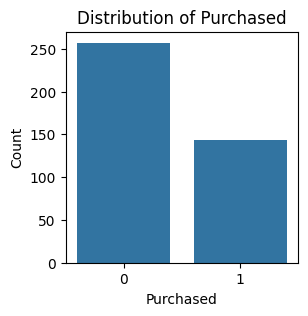

In [19]:
# Visualize the distribution of target classes:
plt.figure(figsize=(3, 3))
sns.countplot(x = 'Purchased' , data = ad)
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Distribution of Purchased')
plt.show()

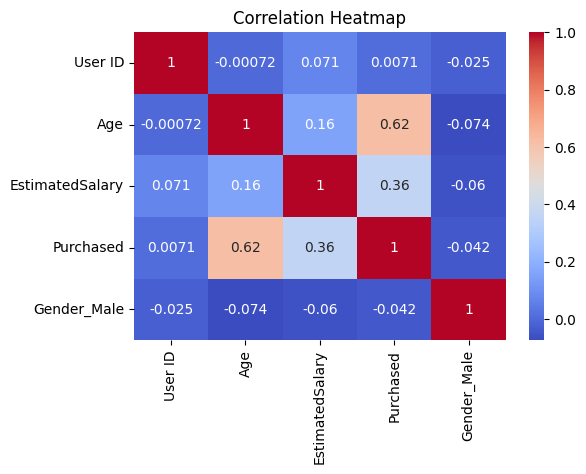

In [20]:
# Visualize a correlation heatmap:
correlation_matrix = ad.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Logistic Regression Modeling :

In [21]:
# Model training
model = LogisticRegression()
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
# Model Prediction
Y_pred = model.predict(X_test)

In [23]:
Y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

## Model Evaluation :

In [26]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.8875


In [29]:
# Confusion Matrix
confusion = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[53  6]
 [ 3 18]]


In [27]:
# Classification Report
classification_rep = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.75      0.86      0.80        21

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [33]:
# ROC Curve and AUC
Y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
fpr, tpr, r  = roc_curve(Y_test, Y_pred_prob)

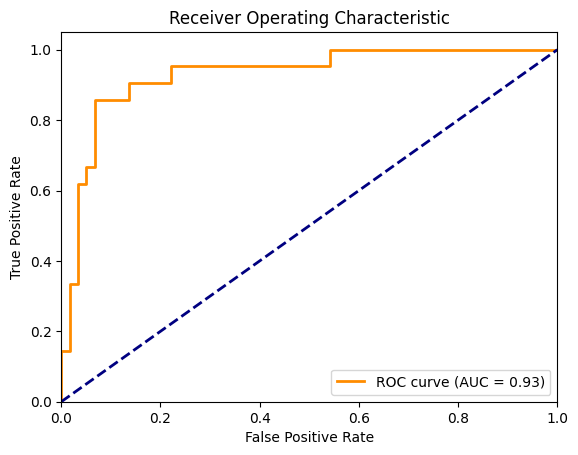

In [34]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()